In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import data
df = pd.read_csv(r"C:\Users\trant\OneDrive\Documents\MIT_DA_Tri1_2024\7130ICT Data Analytics\Lab 2\job-market(3).csv")
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN


Text(0.5, 0, 'Number of jobs')

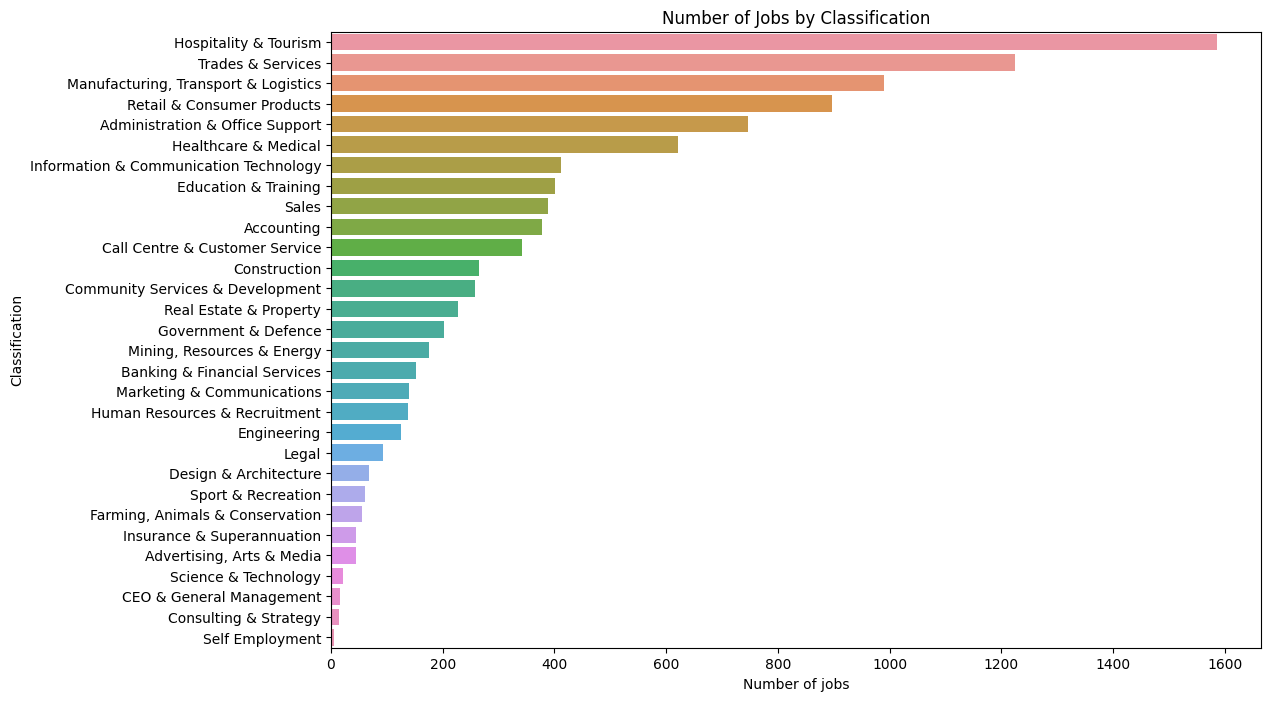

In [14]:
plt.figure(figsize=(12,8))
axi = sns.countplot(y='Classification',data=df,order=df.Classification.value_counts().index)
plt.title('Number of Jobs by Classification')
plt.xlabel('Number of jobs')

In [6]:
# create data frame for salary ranges
df.groupby('LowestSalary').count()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType
LowestSalary,,,,,,,,,,,,
0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740
30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816
40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475
50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821


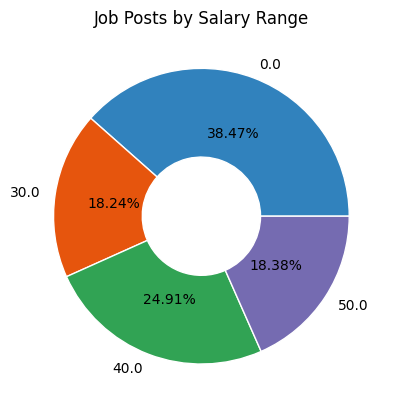

In [7]:
# salary ranges plot

fig, ax = plt.subplots()

size = 0.6
vals = df.groupby('LowestSalary').count()

cmap = plt.colormaps["tab20c"]
color = cmap(np.arange(4)*4)

ax.pie(vals.sum(axis=1), radius=1, colors=color,
       wedgeprops=dict(width=size, edgecolor='w'),
       labels=vals.index,
       autopct='%1.2f%%')

ax.set(title='Job Posts by Salary Range')

plt.show()

In [8]:
#OPTIONAL

locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,Albury Area,19


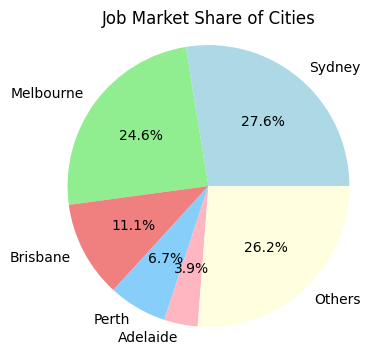

In [18]:
#OPTIONAL

%matplotlib inline
# Pie char for job market share of cities

# Filter out NaN values in the 'Location' column
df_filtered = df.dropna(subset=['Location'])
 
# Define the cities of interest
cities_of_interest = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']
 
# Filter the DataFrame to include only the cities of interest
filtered_df = df_filtered[df_filtered['Location'].isin(cities_of_interest)]
 
# Count the number of job postings for each city
city_counts = filtered_df['Location'].value_counts()
 
# Calculate the total number of job postings for the cities of interest
total_city_counts = city_counts.sum()
 
# Calculate the number of job postings for 'Others'
others_count = len(df_filtered) - total_city_counts
 
# Create labels for the pie chart
labels = cities_of_interest + ['Others']
 
# Concatenate the count for 'Others' to city_counts
city_counts = pd.concat([city_counts, pd.Series({'Others': others_count})])

# Define colors for the pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow']

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(city_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Job Market Share of Cities')
plt.axis('equal')
plt.show()